In [3]:
%cd ~/REVIVAL2

/home/fli/REVIVAL2


In [1]:
%load_ext blackcellmagic

In [7]:
from glob import glob
import pandas as pd
from scipy.stats import spearmanr

from REVIVAL.util import get_file_name

ParLQ


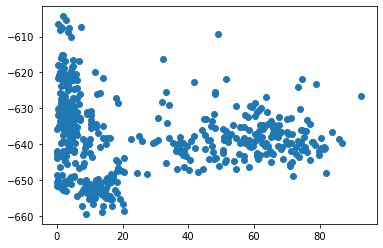

SpearmanrResult(correlation=-0.27851387757343393, pvalue=3.519242291638147e-10)
PfTrpB-4bromo


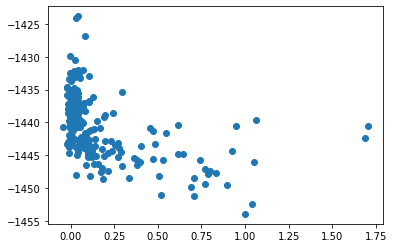

SpearmanrResult(correlation=-0.5254750838827602, pvalue=1.6481478332404956e-18)
PfTrpB-4cyano


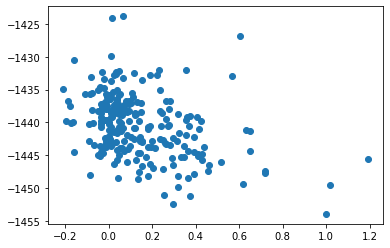

SpearmanrResult(correlation=-0.3733316758684545, pvalue=2.187110136003638e-09)
PfTrpB-56chloro


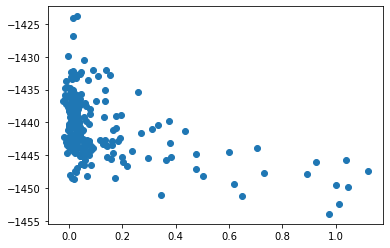

SpearmanrResult(correlation=-0.4277926235321207, pvalue=3.8323851677126996e-12)
PfTrpB-5bromo


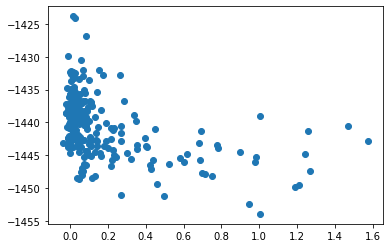

SpearmanrResult(correlation=-0.5079151160071104, pvalue=3.283063127877606e-17)
PfTrpB-5chloro


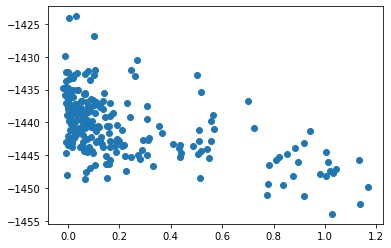

SpearmanrResult(correlation=-0.5562721949419289, pvalue=5.594088250438351e-21)
PfTrpB-5cyano


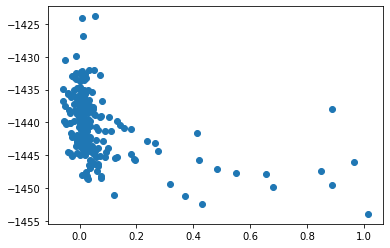

SpearmanrResult(correlation=-0.452617988331198, pvalue=1.4211229369516334e-13)
PfTrpB-5iodo


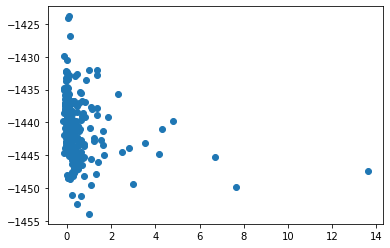

SpearmanrResult(correlation=-0.39587719899866264, pvalue=1.8164435691210935e-10)
PfTrpB-6chloro


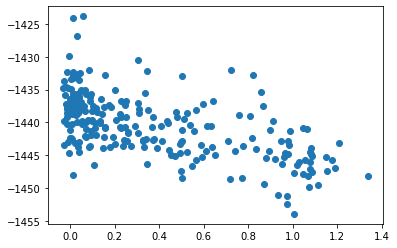

SpearmanrResult(correlation=-0.6061320355380689, pvalue=1.451884936868362e-25)
PfTrpB-7bromo


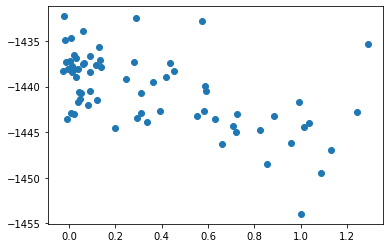

SpearmanrResult(correlation=-0.5552544184448601, pvalue=8.909043624118685e-07)
PfTrpB-7iodo


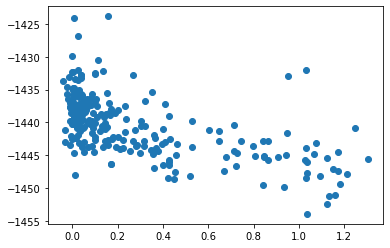

SpearmanrResult(correlation=-0.6353216927762809, pvalue=1.2036179895219756e-28)
PfTrpB-7methyl


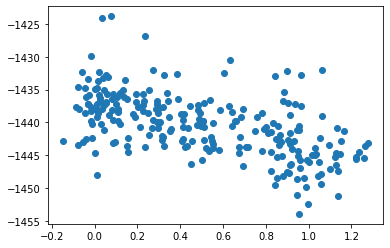

SpearmanrResult(correlation=-0.5787653029731492, pvalue=5.968444765772254e-23)
Rma-CB


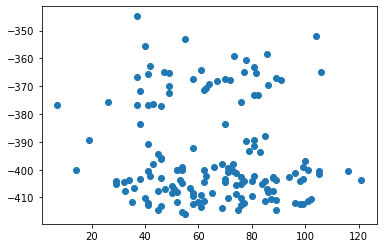

SpearmanrResult(correlation=-0.06516816305488952, pvalue=0.4281801772736409)
Rma-CSi


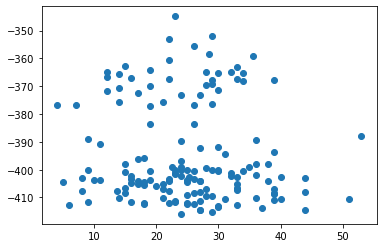

SpearmanrResult(correlation=-0.06369431403255009, pvalue=0.4387216347036824)


In [16]:
for f in sorted(glob("/home/fli/REVIVAL2/zs/triad/score/frompdb/*.csv")):
    print(get_file_name(f))
    df = pd.read_csv(f)
    plt.scatter(df["fitness"], df["Triad_score"])
    plt.show()
    print(spearmanr(df["fitness"], df["Triad_score"]))

In [12]:
for f in sorted(glob("/home/fli/REVIVAL2/zs/triad/score/frompdb-cleanup/*.csv")):
    print(get_file_name(f))
    df = pd.read_csv(f)
    print(spearmanr(df["fitness"], df["Triad_rank"]))

ParLQ
SpearmanrResult(correlation=-0.27851387757343393, pvalue=3.519242291638147e-10)
PfTrpB-4bromo
SpearmanrResult(correlation=-0.5392044803041404, pvalue=1.4040677819176627e-19)
PfTrpB-4cyano
SpearmanrResult(correlation=-0.3685950413223141, pvalue=3.6025129071319925e-09)
PfTrpB-56chloro
SpearmanrResult(correlation=-0.4597822946593839, pvalue=5.2197845884489815e-14)
PfTrpB-5bromo
SpearmanrResult(correlation=-0.5192933363855483, pvalue=4.8191966695917894e-18)
PfTrpB-5chloro
SpearmanrResult(correlation=-0.5755689481604304, pvalue=1.162384047150063e-22)
PfTrpB-5cyano
SpearmanrResult(correlation=-0.4673568581997181, pvalue=1.764313291190536e-14)
PfTrpB-5iodo
SpearmanrResult(correlation=-0.41313998148211656, pvalue=2.3704905251559932e-11)
PfTrpB-6chloro
SpearmanrResult(correlation=-0.6271052576869204, pvalue=9.570550401305796e-28)
PfTrpB-7bromo
SpearmanrResult(correlation=-0.5838073061800969, pvalue=1.7359982490703204e-07)
PfTrpB-7iodo
SpearmanrResult(correlation=-0.6402486542376195, pvalu

In [13]:
import matplotlib.pyplot as plt